In [1]:
#@title Data retrieval and loading
import numpy as np
import os
data_fname = 'steinmetz_decisions.npy'
if data_fname not in os.listdir():
  !wget -qO $data_fname https://osf.io/c5bqn/download
dat = np.load('steinmetz_decisions.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['spks_20ms', 'vis_times', 'resp_times', 'contrastRight', 'contrastLeft', 'response_choice', 'feedbackType', 'brain_region', 'info'])


In [13]:
from sklearn.decomposition import PCA

dat_spike_cnt=np.sum(dat['spks_20ms'],axis=-1)
print(dat_spike_cnt.shape)
pcs=PCA(n_components=3).fit_transform(dat_spike_cnt.T)

(691, 340)


In [10]:
print(pcs.shape)
print(dat['response_choice'].shape)

(340, 3)
(340,)


In [11]:
y=dat['response_choice']

[]

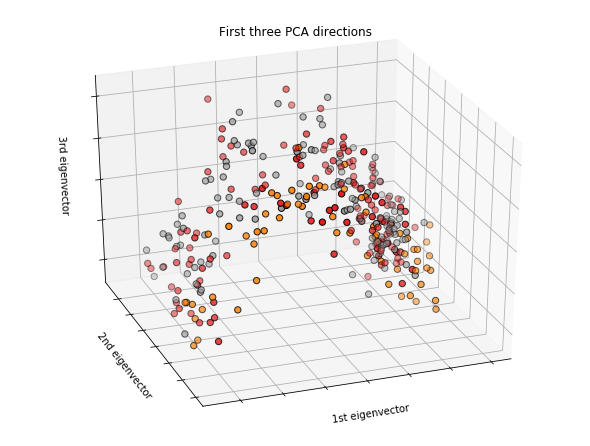

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)


ax.scatter(pcs[:, 0], pcs[:, 1], pcs[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
